<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>NFL Super Bowl Ads</center>
</h1>
</div>


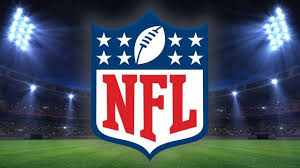

Super Bowl commercials, colloquially known as Super Bowl ads, are high-profile television commercials featured in the U.S. television broadcast of the Super Bowl, the championship game of the National Football League (NFL). Super Bowl commercials have become a cultural phenomenon of their own alongside the game itself, as many viewers only watch the game to see the commercials. Super Bowl advertisements have become iconic and well known because of their cinematographic quality, unpredictability, surreal humor, and use of special effects. The use of celebrity cameos has also been common in Super Bowl ads. Some commercials airing during, or proposed to air during the game, have also attracted controversy due to the nature of their content.<br>
Source : https://en.wikipedia.org/wiki/Super_Bowl_commercials

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Importing Packages</center>
</h1>
</div>


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.graph_objects as go

%config Completer.use_jedi = False

![](https://media3.giphy.com/media/Yq7n1sakPfO1d0O9Wn/giphy.gif?cid=ecf05e475l3zhz4cgevufeqtoma90svhwpdvs8r06m50f4il&rid=giphy.gif)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Reading The Data</center>
</h1>
</div>


In [ ]:
data=pd.read_csv('../input/superbowlads/superbowl-ads.csv', delimiter='^',quotechar='"')
# Line 561 , the 'Year' is missing
data.iloc[561]='2020,'+data.iloc[561]

# Replace quotes with spaces
new = data.iloc[:,0].str.split(',', n = 3, expand = True) 
new[3]=new[3].str.replace('"','')
new[1]=new[1].str.replace('"','')
new[2]=new[2].str.strip('"')
new2=new[2].str.split('""', n = 1, expand = True) 
new = pd.concat([new.iloc[:,[0,1]],new2,new.iloc[:,3]],axis=1).values

# Build the final dataframe
data2=pd.DataFrame(new,columns=["Year","Type","Product","Title","Notes"])
data2=data2.loc[data2['Type']!='Product type']
del data , new , new2
data2.head()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Most Shown Ad Categories During NFL</center>
</h1>
</div>


In [ ]:
def plot_pie_charts(x, y, title):
    # more muted color 
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c,shadow=True, labels=[x[i]+' '+str(y[i]*100/sum(y))[:5]+'%' for i in range(len(x))])
    plt.legend(x, loc='best', fontsize=12)
    plt.show()

In [ ]:
data2['Type']=data2['Type'].apply(lambda x : x.lower())
grouped=data2.groupby('Type').count()
grouped.sort_values('Product',ascending=False,inplace=True)
grouped_10=grouped[:10]
plot_pie_charts(grouped_10.index,grouped_10['Product'].values,'Pie Chart For Top 10 Products shown in NFL Ads')

### **We can see that films conquer over the ads for NFL followed by cars and beer :)**

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Number Of Ads Over The Years</center>
</h1>
</div>


In [ ]:
data2['Year']=pd.to_datetime(data2['Year'])
grouped_year=data2.groupby('Year').count()
px.line(x=grouped_year.index,y=grouped_year['Product'],labels={'x':'Year','y':'Number of ads'},template='plotly_dark',title='Number of ads over the years')

### We can see the peak of number of ads during 2018 Nfl :)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Evolution In The Number Of Different Types Of Ads Over The Years</center>
</h1>
</div>


In [ ]:
datan=data2[data2['Type'].isin(grouped_10.index[:8])]
datax=datan.groupby(['Year','Type']).count()
datax.sort_values('Product',ascending=False,inplace=True)
new_df=pd.DataFrame()
new_df['Year']=np.array(list(datax.index))[:,0]
new_df['Type']=np.array(list(datax.index))[:,1]
new_df['Count']=datax['Product'].values
new_df['Year']=pd.to_datetime(new_df['Year'])
fig_area=px.area(new_df,x='Year',y='Count',color='Type',template='plotly_dark',title='Evolution of different types over the years')
fig_area.show()


### We can see that the soft drink ads are now overtaking every other type in the race

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Effect Of Ads On Products And Their Stocks</center>
</h1>
</div>


![](https://media1.giphy.com/media/mGDCsAwdwoAGPurO6p/giphy.gif?cid=ecf05e47essqjsi8r5bap6sh8gkwm9s0t6hkvspva7p7c46q&rid=giphy.gif)
<br>
### A new study suggests that commercials can influence investor behavior in real time, leading to a slight boost in trading activity in the advertiser’s stock.


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Coca-Cola</center>
</h1>
</div>


![](https://media2.giphy.com/media/Q8s2PaenLsWh8029uz/giphy.gif?cid=ecf05e47l9skuevlkojoqrw8me8wrrjld2ius0xc12ukmtqp&rid=giphy.gif)

In [ ]:
coca=pd.read_csv('../input/stock-data/coca_cola.csv')
fig=go.Figure(go.Scatter(x=coca.Date,y=coca.Open))
fig.add_annotation(
  x='1979-01-01',  # arrows' head
  y=0.9,  # arrows' head
  ax='1979-01-01',  # arrows' tail
  ay=15,  # arrows' tail
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  text='1979 NFL Ad',  
  showarrow=True,
  arrowhead=1,
  arrowsize=1,
  arrowwidth=3,
  arrowcolor='Orange'
)
fig.add_annotation(
  x='2010-08-09',  # arrows' head
  y=27,  # arrows' head
  ax='2008-01-01',  # arrows' tail
  ay=27+15,  # arrows' tail
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  text='2010 NFL Ad',  
  showarrow=True,
  arrowhead=1,
  arrowsize=1,
  arrowwidth=3,
  arrowcolor='Orange'
)
fig.add_annotation(
  x='2014-08-04',  # arrows' head
  y=40,  # arrows' head
  ax='2012-01-01',  # arrows' tail
  ay=40+15,  # arrows' tail
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  text='2014 NFL Ad',  
  showarrow=True,
  arrowhead=1,
  arrowsize=1,
  arrowwidth=3,
  arrowcolor='Orange'
)
fig.update_layout(template='plotly_dark',title={'text' : 'Coca Cola Stock Prices Over Years And Changes After its ad in NFL'})
fig.show()

### We can clearly see the sudden increase after 2010 NFL ad and 2014 nfl ad WOW :)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Budweiser</center>
</h1>
</div>


![](https://media4.giphy.com/media/xT9DPCPidCIOQknq0g/giphy.gif?cid=ecf05e478w1881h0u260f7c2dxaxq0odjowdzpezjfbjs0ov&rid=giphy.gif)

### Let's analyse the budwieser stocks now :)

In [ ]:
bud=pd.read_csv('../input/stock-data/Budweiser.csv')
fig=go.Figure(go.Scatter(x=bud.Date,y=bud.Open))
fig.add_annotation(
  x='2009-08-10',  # arrows' head
  y=41.5,  # arrows' head
  ax='2010-01-01',  # arrows' tail
  ay=41.5+30,  # arrows' tail
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  text='2009 NFL Ad',  
  showarrow=True,
  arrowhead=1,
  arrowsize=1,
  arrowwidth=3,
  arrowcolor='Orange'
)
fig.add_annotation(
  x='2010-08-9',  # arrows' head
  y=55.6,  # arrows' head
  ax='2011-01-01',  # arrows' tail
  ay=55.6+30,  # arrows' tail
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  text='2010 NFL Ad',  
  showarrow=True,
  arrowhead=1,
  arrowsize=1,
  arrowwidth=3,
  arrowcolor='Orange'
)
fig.add_annotation(
  x='2012-08-05',  # arrows' head
  y=85,  # arrows' head
  ax='2013-01-01',  # arrows' tail
  ay=85+30,  # arrows' tail
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  text='2012 NFL Ad',  
  showarrow=True,
  arrowhead=1,
  arrowsize=1,
  arrowwidth=3,
  arrowcolor='Orange'
)
fig.add_annotation(
  x='2014-08-4',  # arrows' head
  y=113,  # arrows' head
  ax='2015-01-01',  # arrows' tail
  ay=113+30,  # arrows' tail
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  text='2014 NFL Ad',  
  showarrow=True,
  arrowhead=1,
  arrowsize=1,
  arrowwidth=3,
  arrowcolor='Orange'
)
fig.update_layout(template='plotly_dark',title={'text':'Budweiser Stock Analysis and changes after its ads in NFL'})
fig.show()

### Wow the ads are so powerfull :) We can clearly see the sudden increase :)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Change In Ad Price Over Years</center>
</h1>
</div>


![](https://media4.giphy.com/media/VVi8MCOHC0bfmeSaBE/giphy.gif?cid=ecf05e478yc0bhcvdzgql3p1de7iz0n0i6mu62wdq9tcu1zj&rid=giphy.gif)

## Let's see the change in super bowl ads rates over the years

In [ ]:
cc=pd.read_csv('../input/super-bowl-data/super_bowl.csv',header=None)
fig_trend=px.scatter(x=cc[0],y=cc[1],template='plotly_dark',title='Trend line plot for the ad price over the years',labels={'x':'Year','y':'Price of the ad'},trendline="lowess",trendline_color_override="red")
fig_trend.show()

## The Ads are really powerful tools to promote but are expensive too :) 

## Source of the above data is Nielsen Media Research
## Reference from https://superbowl-ads.com/cost-of-super-bowl-advertising-breakdown-by-year/

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Word Cloud For Different Topics</center>
</h1>
</div>


In [ ]:
data2['overall text']=data2.Title.astype("str")+" "+data2.Notes.astype("str")
dd=data2[data2['Type']=='film']
text=" ".join(dd['overall text'])
wordcloud = WordCloud(width=1500, height=500).generate(text)
plt.figure(figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear');
plt.title('Film') ;
plt.axis("off") ;

In [ ]:
nn=grouped_10.index[1:9]
fig, ax = plt.subplots(4, 2, figsize=(18,8))
k=0
j=0
for i in nn:
    dd=data2[data2['Type']==i]
    text=" ".join(dd['overall text'])

    wordcloud = WordCloud(width=1500, height=500).generate(text)

    ax[k,j].imshow(wordcloud, interpolation='bilinear')
    ax[k,j].set_title(i)
    ax[k, j].set_axis_off()
    j+=1
    if j>1:
        k+=1
        j=0

In [ ]:
dd=data2[data2['Type']=='sports']
text=" ".join(dd['overall text'])
wordcloud = WordCloud(width=1500, height=500).generate(text)
plt.figure(figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear');
plt.title('sports') ;
plt.axis("off") ;

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>New And Awesome Facts I Learned About NFL 2018</center>
</h1>
</div>


After the Super Bowl came to a close, Google shared some statistical insights into how the trends played out during the game. Here are some of their findings:

* Viewership of Super Bowl ads on YouTube saw a 16% increase in viewership year to date, with viewership on the living room increasing by 52%.<br>
* Justin Timberlake's music on YouTube peaked at over 500,000 views per hour in the US during the game. That's nearly 500% higher than his hourly average last Sunday.

source : https://www.cbssports.com/nfl/news/super-bowl-2018-commercials-the-five-best-and-worst-ads-from-sundays-game/

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Conclusion</center>
</h1>
</div>


### Ads are really powerful and can give your product a sudden boost :)

![](https://media1.giphy.com/media/kfvEdnjjcAoea0naii/giphy.gif?cid=ecf05e471mwkxd2l1317qbmozxto47kq0mpwrgm47zsz4zbg&rid=giphy.gif)